Time cost (Bias computation): 0.5s

Baseline Model Evaluation (Simple Bias-Based)

MAE = 0.7710940008258919


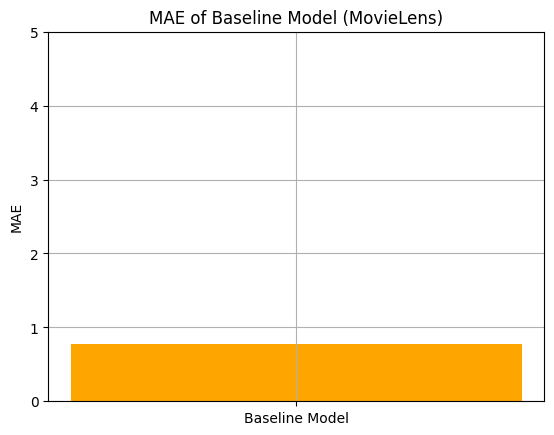

In [ ]:
# Baseline Model (mu + bu + bi) - MovieLens

import pandas as pd
import numpy as np
import time
import scipy as sp
from scipy import sparse
import matplotlib.pyplot as plt

num_users = 943
num_items = 1682

# Load training set
df_training = pd.read_csv('u1.base', sep='\t', names=['User ID', 'Movie ID', 'Rating', 'Timestamp'])
values = df_training.values
values[:, 0:2] -= 1

train_user_indices = values[:, 0].astype(int)
train_item_indices = values[:, 1].astype(int)
train_ratings = values[:, 2]

sp_training = sparse.csr_matrix((train_ratings, (train_user_indices, train_item_indices)), shape=(num_users, num_items), dtype=np.float64)

# Load test set
df_test = pd.read_csv('u1.test', sep='\t', names=['User ID', 'Movie ID', 'Rating', 'Timestamp'])
values = df_test.values
values[:, 0:2] -= 1

data = values[:, 2]
rows = values[:, 0]
cols = values[:, 1]
sp_test = sparse.csr_matrix((data, (rows, cols)), shape=(num_users, num_items), dtype=np.float64)

# Start bias computation
start = time.time()

mu = sp_training.data.mean()
bu = np.zeros(num_users)
bi = np.zeros(num_items)

# Compute user bias
for u in range(num_users):
    user_ratings = sp_training.getrow(u).toarray().flatten()
    rated = user_ratings > 0
    if np.any(rated):
        bu[u] = np.mean(user_ratings[rated] - mu)

# Compute item bias
for i in range(num_items):
    item_ratings = sp_training.getcol(i).toarray().flatten()
    rated = item_ratings > 0
    if np.any(rated):
        bi[i] = np.mean(item_ratings[rated] - mu)

end = time.time()
print("Time cost (Bias computation): {:.1f}s".format(end - start))

# Predict using baseline formula
def predict(user, item):
    return mu + bu[user] + bi[item]

# Compute MAE
def computeMAE():
    start = time.time()
    MAE = 0.0
    rows, cols = sp_test.nonzero()
    for j in range(len(rows)):
        actual = sp_test[rows[j], cols[j]]
        predicted = predict(rows[j], cols[j])
        MAE += abs(actual - predicted)
    MAE /= len(rows)
    print()
    return MAE


# Run test
def test():
    print("\nBaseline Model Evaluation (Simple Bias-Based)")
    MAE = computeMAE()
    print("MAE =", MAE)

    # plot MAE result
    plt.bar(['Baseline Model'], [MAE], color='orange')
    plt.title('MAE of Baseline Model (MovieLens)')
    plt.ylabel('MAE')
    plt.ylim(0, 5)
    plt.grid(True)
    plt.show()

if __name__ == '__main__':
    test()
